# **Insurance cost prediction: EDA and Hypothesis testing**

## **EDA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("insurance_1.csv")

In [3]:
data.head()

,PatientID,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,1,45,0,0,0,0,155,57,0,0,0,25000
1,2,60,1,0,0,0,180,73,0,0,0,29000
2,3,36,1,1,0,0,158,59,0,0,1,23000
3,4,52,1,1,0,1,183,93,0,0,2,28000
4,5,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
data.isna().sum()

PatientID                  0
Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [5]:
data.duplicated(subset=["Age","Diabetes", "BloodPressureProblems","AnyTransplants", "AnyChronicDiseases", "Height","Weight", "KnownAllergies","HistoryOfCancerInFamily",
                        "NumberOfMajorSurgeries", "PremiumPrice"]).sum()

0

### No missing values or duplicates were found in the dataset.

In [8]:
data[["Age","Height","Weight","PremiumPrice"]].describe()

,Age,Height,Weight,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000
mean,41.745436,168.182556,76.950304,24336.713996
std,13.963371,10.098155,14.265096,6248.184382
min,18.000000,145.000000,51.000000,15000.000000
25%,30.000000,161.000000,67.000000,21000.000000
50%,42.000000,168.000000,75.000000,23000.000000
75%,53.000000,176.000000,87.000000,28000.000000
max,66.000000,188.000000,132.000000,40000.000000


### Some of the distribution-focused visualizations such as KDE density plots, violin plots and pairplots could not be generated using Tableau. These were generated using Python to complement the analysis the EDA analysis.

### **Feature engineering**
### BMI = weight(kg)/height(m)^2
### BMI categories: Underweight (<18.5), Healthy Weight (18.5–24.9), Overweight (25.0–29.9), and Obese (30.0+)

In [9]:
data['BMI'] = np.round(data['Weight']/(data['Height']/100)**2,2)
conditions = [
    data['BMI'] < 18.5,
    (data['BMI'] >= 18.5) & (data['BMI'] < 25),
    (data['BMI'] >= 25) & (data['BMI'] < 30),
    data['BMI'] >= 30
]

choices = ["Underweight", "Healthy", "Overweight", "Obese"]

data['BMI_cat'] = np.select(conditions, choices)

In [10]:
data['BMI_cat'].value_counts()

BMI_cat
Overweight     324
Healthy        320
Obese          304
Underweight     38
Name: count, dtype: int64

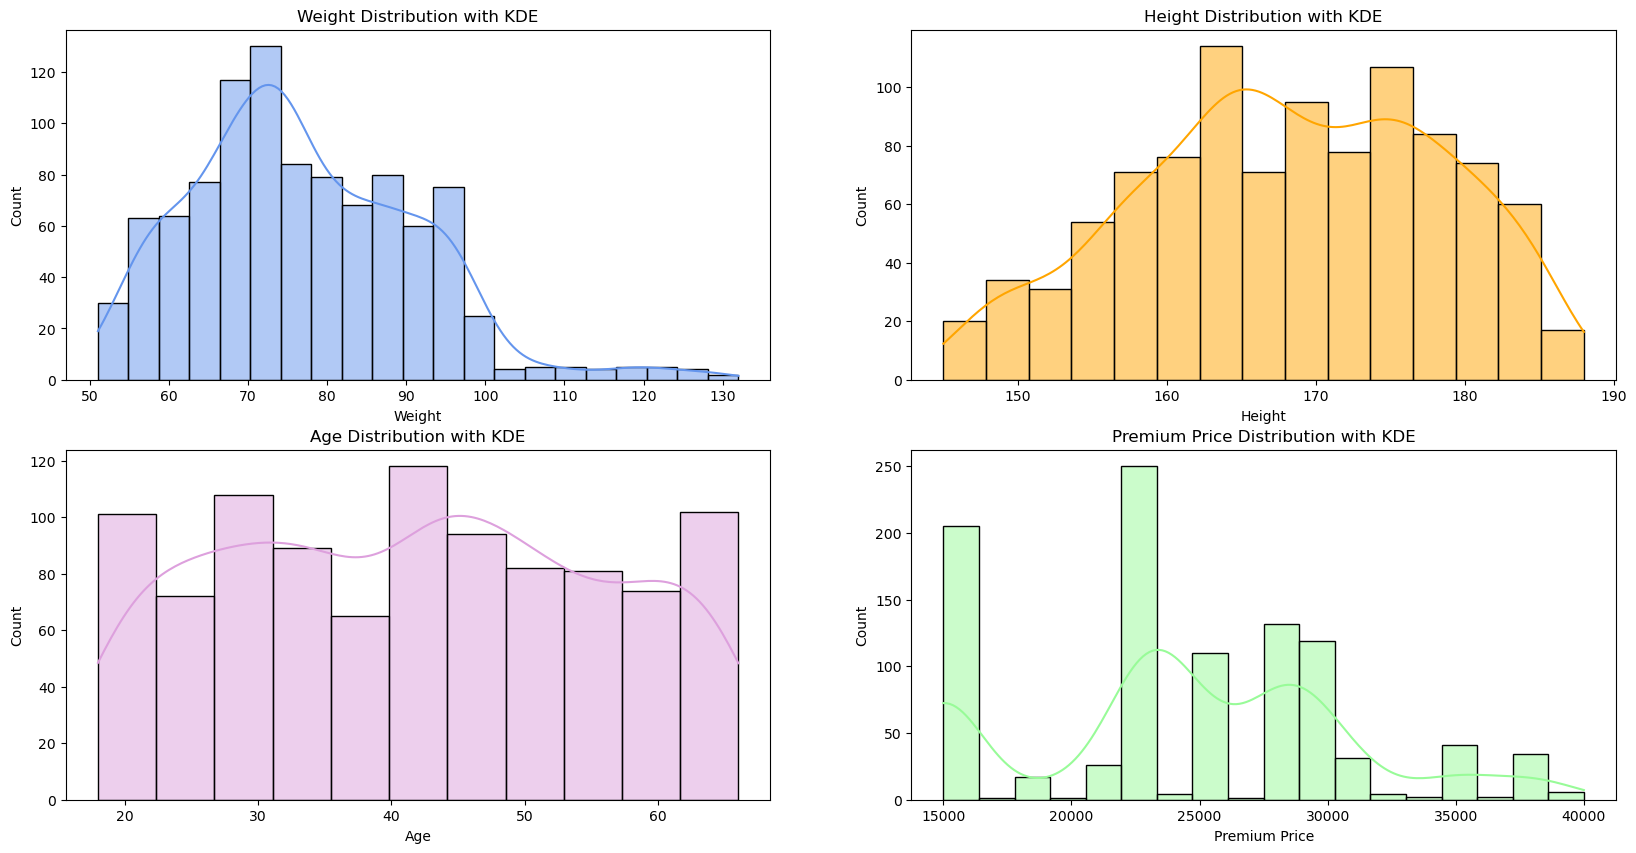

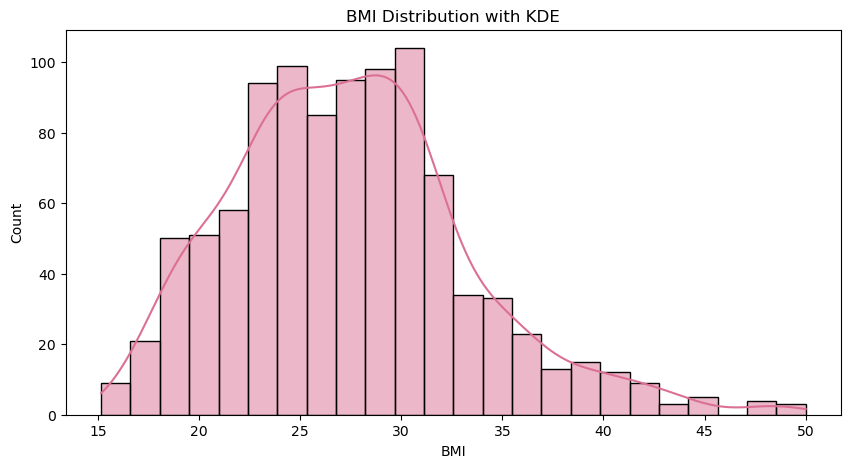

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

sns.histplot(data['Weight'],kde=True,ax=ax[0][0], color="cornflowerblue")
ax[0][0].set_title("Weight Distribution with KDE")
ax[0][0].set_xlabel("Weight")
ax[0][0].set_ylabel("Count")

sns.histplot(data['Height'],kde=True,ax=ax[0][1], color="orange")
ax[0][1].set_title("Height Distribution with KDE")
ax[0][1].set_xlabel("Height")
ax[0][1].set_ylabel("Count")

sns.histplot(data['Age'],kde=True,ax=ax[1][0], color="plum")
ax[1][0].set_title("Age Distribution with KDE")
ax[1][0].set_xlabel("Age")
ax[1][0].set_ylabel("Count")

sns.histplot(data['PremiumPrice'],kde=True,ax=ax[1][1], color="palegreen")
ax[1][1].set_title("Premium Price Distribution with KDE")
ax[1][1].set_xlabel("Premium Price")
ax[1][1].set_ylabel("Count")

plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data['BMI'],kde=True,color="palevioletred")
plt.title("BMI Distribution with KDE")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

### Weight ranges from 50-100 almost following a normal distribution with peak for ages ~65-75. However, there are a few outliers with extreme weight values above 100 kgs.
### Height is distributed within the range ~145-185. 
### Age ranged from 18 to 66 and is uniformly distributed.
### Premium price ranges from as low as 15000 upto around 40,000. However, there's is no apparent pattern of distribution visible from the histogram. There are peaks around 15000, 23000 and a few smaller peaks between 25000 to 30000. All other peaks are very small and cover only a few cases.
### BMI has a normal distribution with a slight right skew as per the histogram. The range is between 15-50 with values above ~37-40 probably being the outliers.

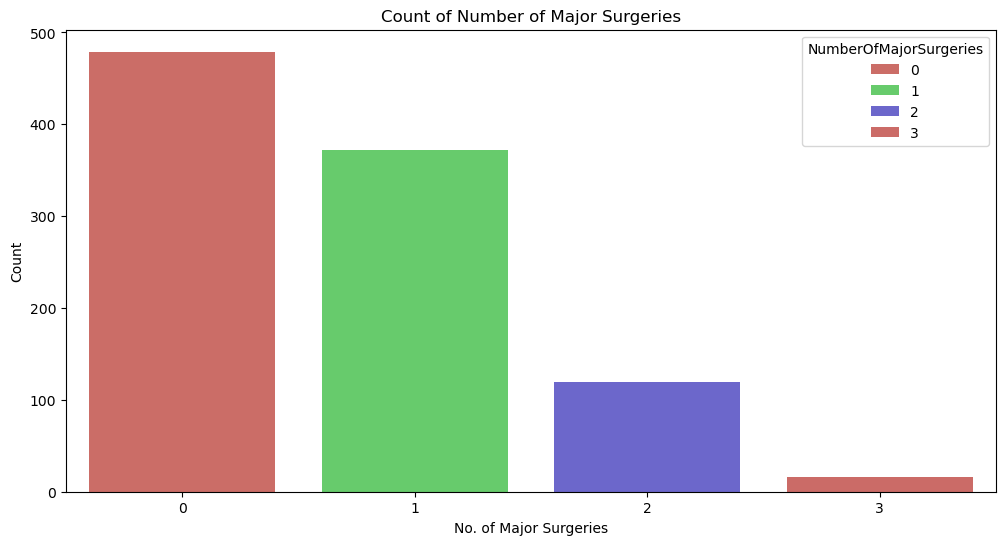

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='NumberOfMajorSurgeries',hue='NumberOfMajorSurgeries', palette= "hls")
plt.title("Count of Number of Major Surgeries")
plt.xlabel("No. of Major Surgeries")
plt.ylabel("Count")

plt.show()

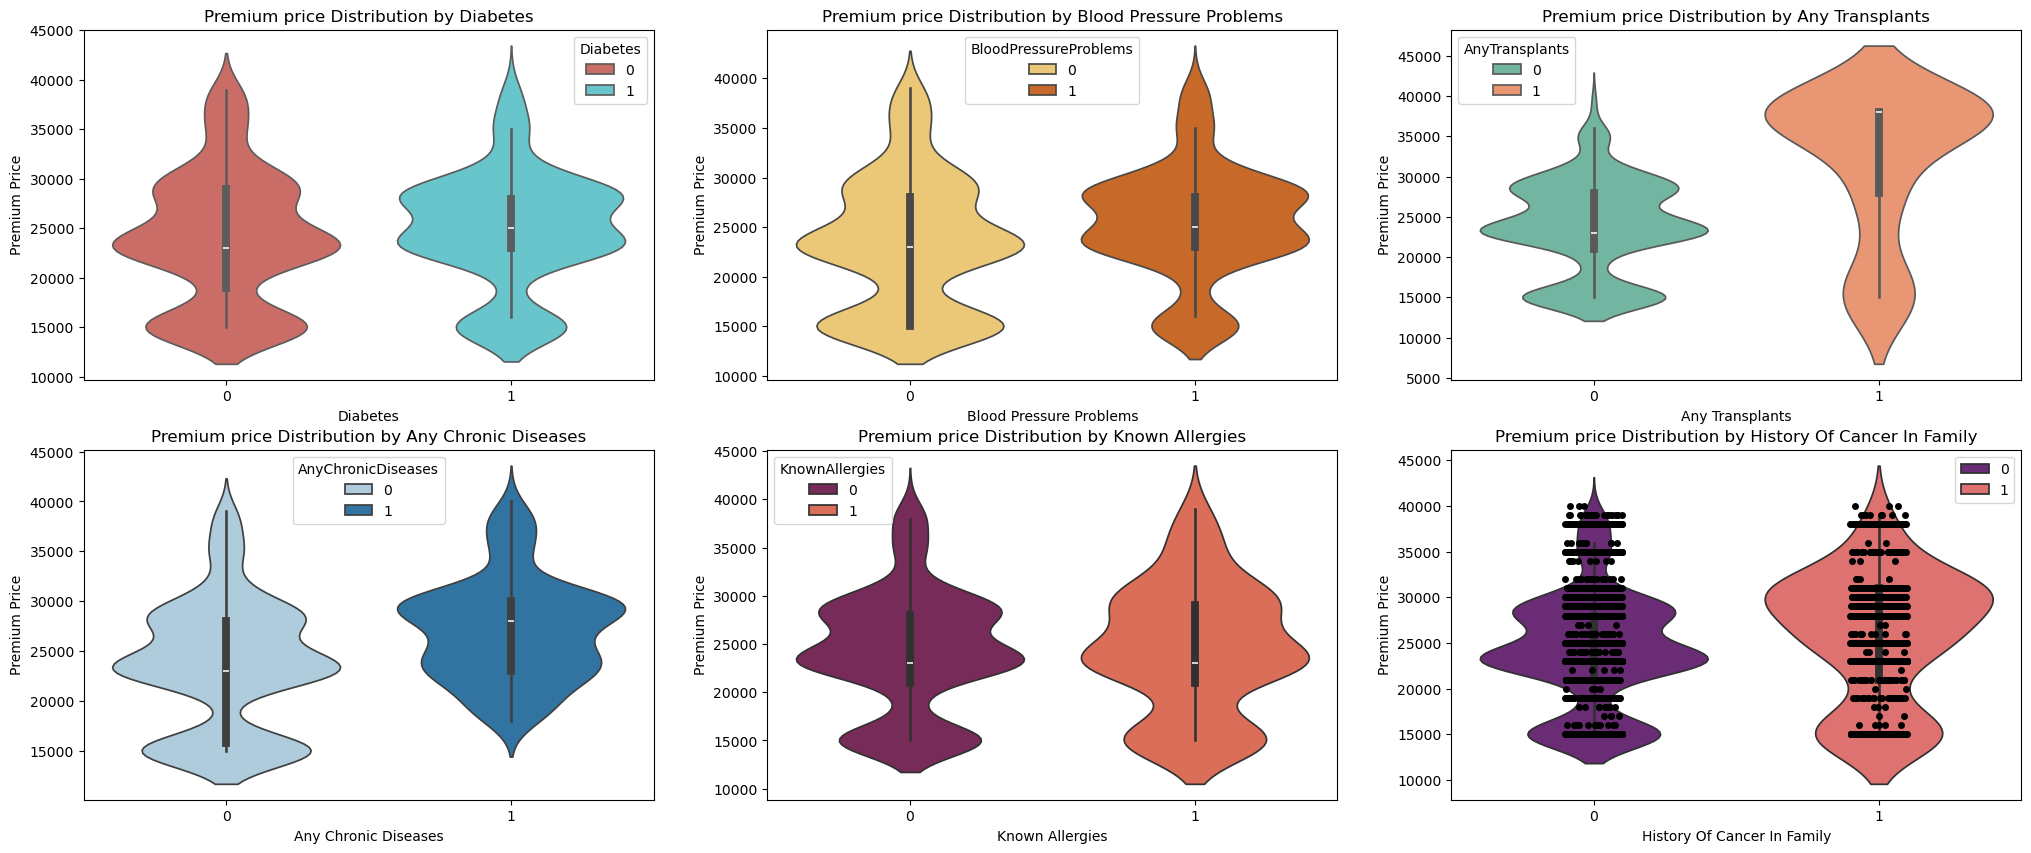

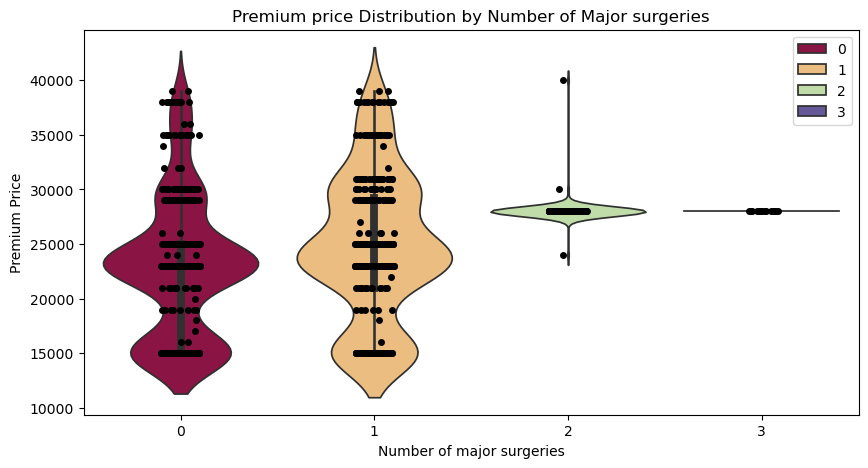

In [16]:
#BloodPressureProblems 	AnyTransplants 	AnyChronicDiseases 	Height 	Weight 	KnownAllergies 	HistoryOfCancerInFamily 	NumberOfMajorSurgeries 	
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
# Diabetes
sns.violinplot(x='Diabetes', y='PremiumPrice', data = data, hue="Diabetes", ax=ax[0][0], palette='hls')
sns.stripplot(data=data, x="Diabetes", y="PremiumPrice", color='black')
ax[0][0].set_title("Premium price Distribution by Diabetes")
ax[0][0].set_xlabel("Diabetes")
ax[0][0].set_ylabel("Premium Price")

# Bloodpressure
sns.violinplot(x='BloodPressureProblems', y='PremiumPrice', data = data, hue="BloodPressureProblems", ax=ax[0][1], palette='YlOrBr')
sns.stripplot(data=data, x="BloodPressureProblems", y="PremiumPrice", color='black')
ax[0][1].set_title("Premium price Distribution by Blood Pressure Problems")
ax[0][1].set_xlabel("Blood Pressure Problems")
ax[0][1].set_ylabel("Premium Price")

#Transplants
sns.violinplot(x='AnyTransplants', y='PremiumPrice', data = data, hue="AnyTransplants", ax=ax[0][2], palette='Set2')
sns.stripplot(data=data, x="AnyTransplants", y="PremiumPrice", color='black')
ax[0][2].set_title("Premium price Distribution by Any Transplants")
ax[0][2].set_xlabel("Any Transplants")
ax[0][2].set_ylabel("Premium Price")

#Chronic Diseases
sns.violinplot(x='AnyChronicDiseases', y='PremiumPrice', data = data, hue="AnyChronicDiseases", ax=ax[1][0], palette='Paired')
sns.stripplot(data=data, x="AnyChronicDiseases", y="PremiumPrice", color='black')
ax[1][0].set_title("Premium price Distribution by Any Chronic Diseases")
ax[1][0].set_xlabel("Any Chronic Diseases")
ax[1][0].set_ylabel("Premium Price")

# Known Allergies
sns.violinplot(x='KnownAllergies', y='PremiumPrice', data = data, hue="KnownAllergies", ax=ax[1][1], palette='rocket')
sns.stripplot(data=data, x="KnownAllergies", y="PremiumPrice", color='black')
ax[1][1].set_title("Premium price Distribution by Known Allergies")
ax[1][1].set_xlabel("Known Allergies")
ax[1][1].set_ylabel("Premium Price")

# History of Cancer In Family
sns.violinplot(x='HistoryOfCancerInFamily', y='PremiumPrice', data = data, hue="HistoryOfCancerInFamily", ax=ax[1][2], palette='magma')
sns.stripplot(data=data, x="HistoryOfCancerInFamily", y="PremiumPrice", color='black')
ax[1][2].set_title("Premium price Distribution by History Of Cancer In Family")
ax[1][2].set_xlabel("History Of Cancer In Family")
ax[1][2].set_ylabel("Premium Price")

plt.show()

# Number of major surgeries
plt.figure(figsize=(10,5))
sns.violinplot(x='NumberOfMajorSurgeries', y='PremiumPrice', data = data, hue="NumberOfMajorSurgeries", palette='Spectral')
sns.stripplot(data=data, x="NumberOfMajorSurgeries", y="PremiumPrice", color='black')
plt.title("Premium price Distribution by Number of Major surgeries")
plt.xlabel("Number of major surgeries")
plt.ylabel("Premium Price")
plt.show()

### From the violin plots it is apparent that the premium price is higher when a person has any transplants, chronic diseases, a history of cancer in the family or if they have had two or more major surgeries. These factors seem to be contributing in determination of premium price. 

### Creating Age categories:
* Teens => <20
* Young adults: 20-35
* Older adults: 35-45
* Early middle-aged: 45-55
* Late middle-aged: 55-60
* Seniors: 60+

In [18]:
bins = [0, 20, 35, 45, 55, 60, float('inf')]
labels = ["Teens (<20)", "Young adults (20-35)", "Older adults (35-45)", "Early Middle-aged (45-55)", "Late Middle-aged (55-60)", "Seniors (60+)"]
data['Age_Cat'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
data.head()

,PatientID,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_cat,Age_Cat
0,1,45,0,0,0,0,155,57,0,0,0,25000,23.73,Healthy,Early Middle-aged (45-55)
1,2,60,1,0,0,0,180,73,0,0,0,29000,22.53,Healthy,Seniors (60+)
2,3,36,1,1,0,0,158,59,0,0,1,23000,23.63,Healthy,Older adults (35-45)
3,4,52,1,1,0,1,183,93,0,0,2,28000,27.77,Overweight,Early Middle-aged (45-55)
4,5,38,0,0,0,1,166,88,0,0,1,23000,31.93,Obese,Older adults (35-45)


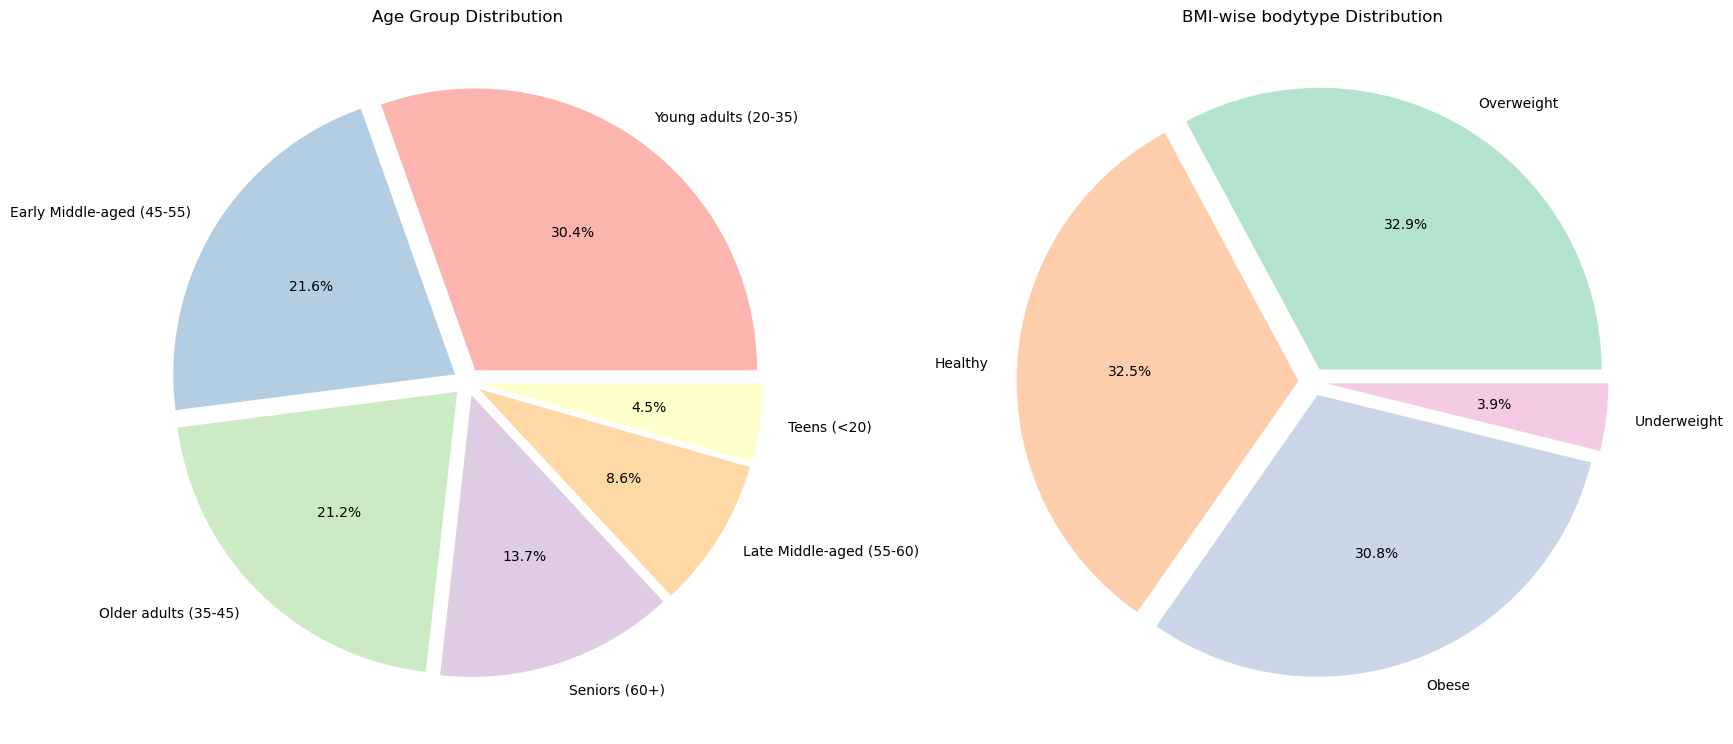

In [19]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize= (20,10))

counts = data['Age_Cat'].value_counts()
explode = [0.05] * len(counts)
colors = plt.cm.Pastel1(range(len(counts)))
#plt.pie(counts, labels=counts.index, autopct='%1.1f%%', explode=explode)
ax[0].pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%', explode=explode)
#plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title("Age Group Distribution")

counts_bmi = data['BMI_cat'].value_counts()
explode_bmi = [0.05] * len(counts_bmi)
colors_bmi = plt.cm.Pastel2(range(len(counts_bmi)))
ax[1].pie(counts_bmi, labels=counts_bmi.index, colors=colors_bmi, autopct='%1.1f%%', explode=explode_bmi)
ax[1].set_title("BMI-wise bodytype Distribution")
plt.show()

### Among the customers, the high count of people is between the ages of 20 - 35 which makes up the young adult group, followed by early middle aged people betwwen the ages 45-55 and older adults between the ages 35-45. Generally, the young adults and older adults do not have major health problems and hence might have a low premium price. Early middle aged group might have certain life-style related and stress related health issues. The count of people from the other 3 groups: Teens (<20), late middle-aged (55-60) and seniors (>60) are very less. 

### There is almost an equal distribution of people with a healthly, overweight and obese BMI and very less number of people with underweight BMI.

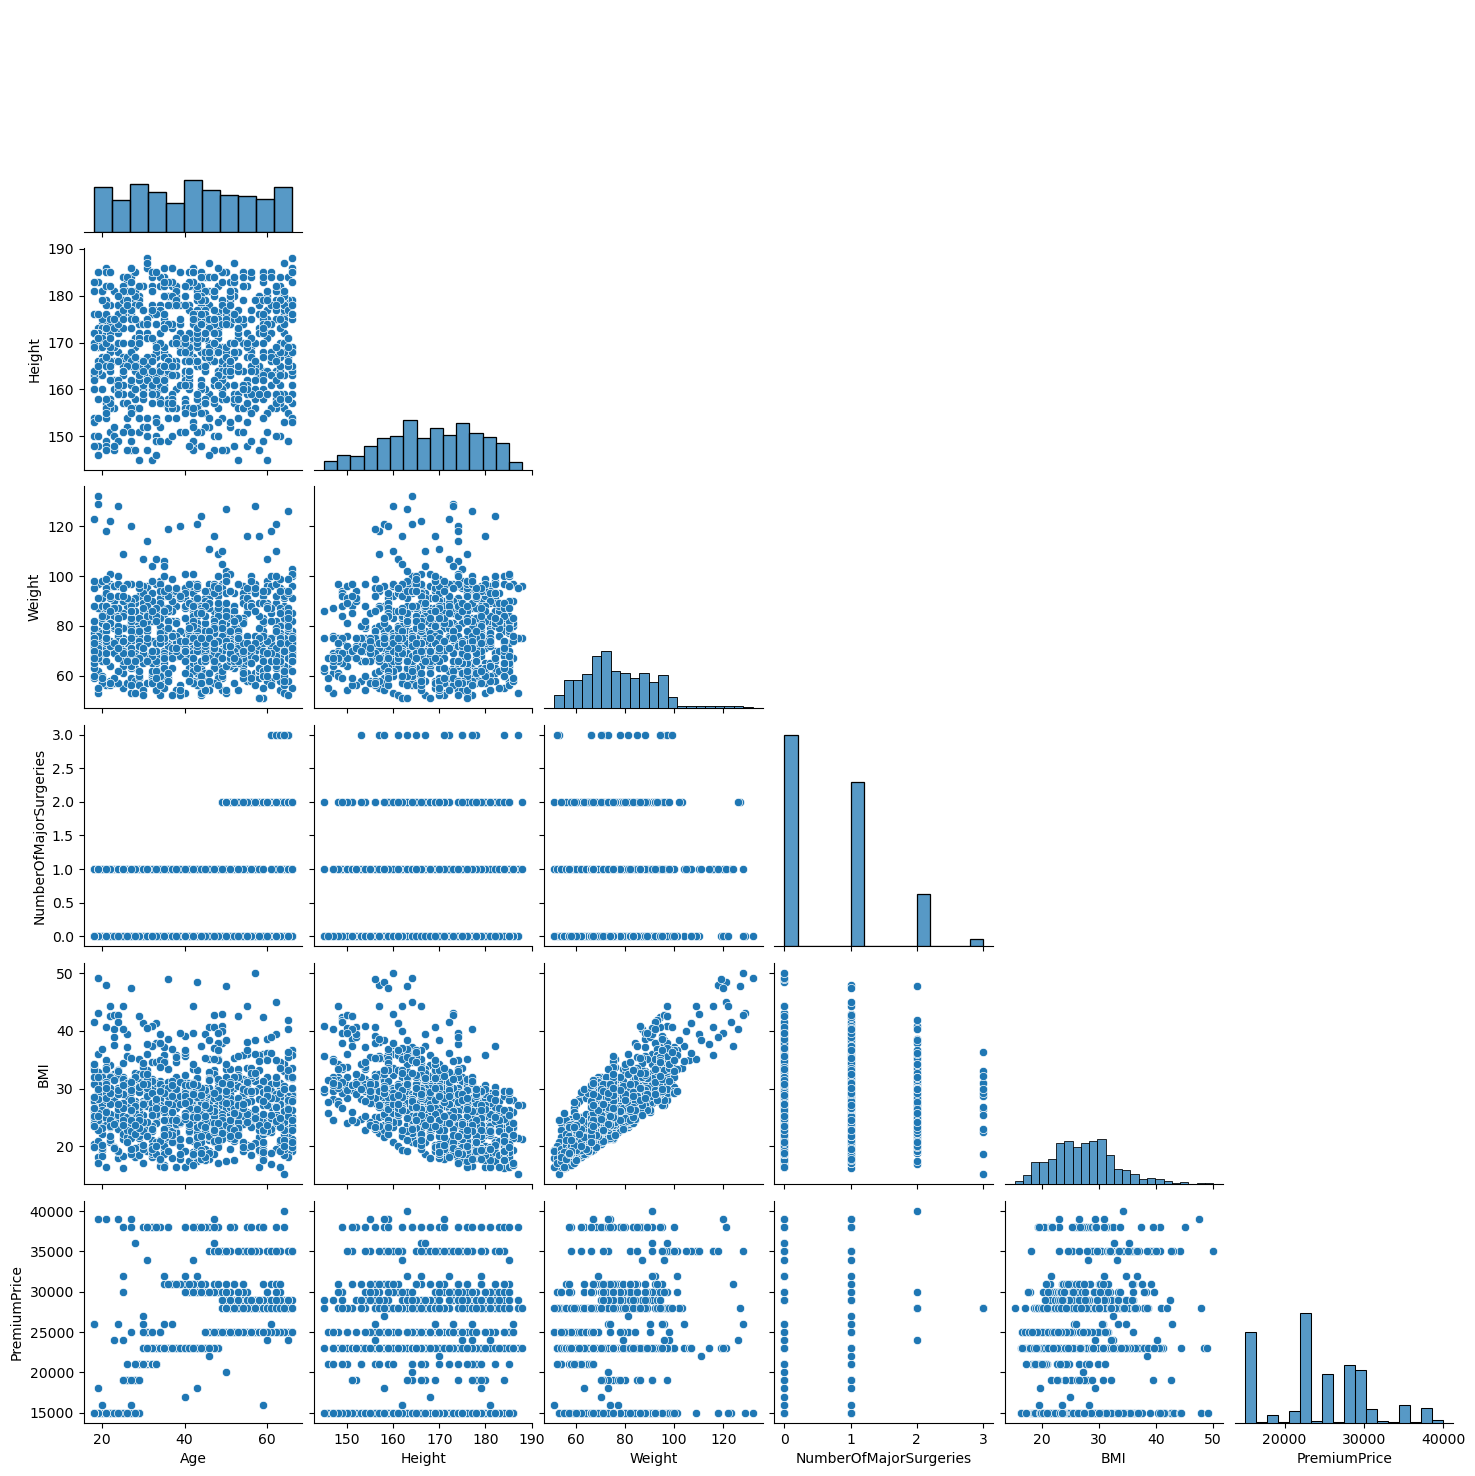

In [20]:
#sns.pairplot(data[['Age','Height','Weight','NumberOfMajorSurgeries','PremiumPrice','BMI']],corner=True)
sns.pairplot(data[['Age','Height','Weight','NumberOfMajorSurgeries','BMI','PremiumPrice']],corner=True)
plt.show()

### The pairplots are not very informative of a clear connection between any particular variable and premium price.

### **Correlation Analysis**

In [21]:
# Select only numerical columns
num_df = data.drop(columns=["PatientID","BMI_cat","Age_Cat"])
corr_matrix = num_df.corr()
corr_matrix.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540,-0.042012
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209,-0.022902
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097,-0.038026
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056,0.023514
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610,-0.057008


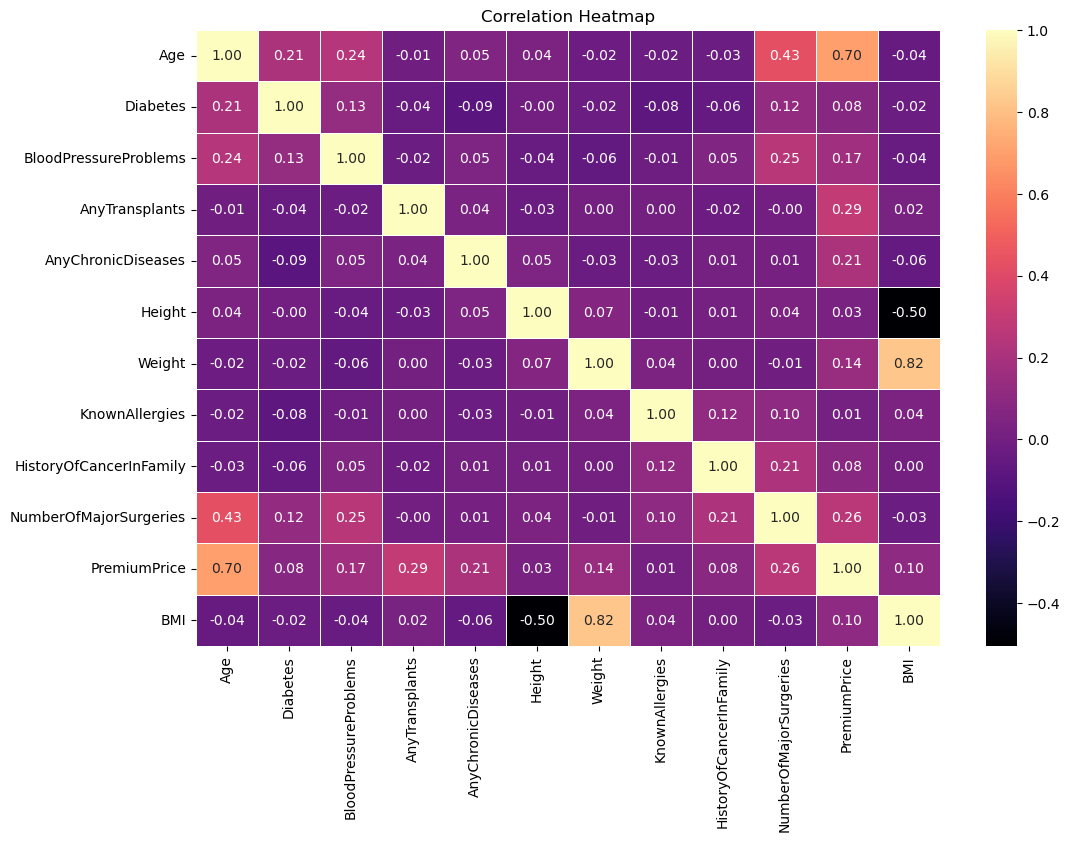

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="magma", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
premium_corr = corr_matrix['PremiumPrice'].sort_values(ascending=False)

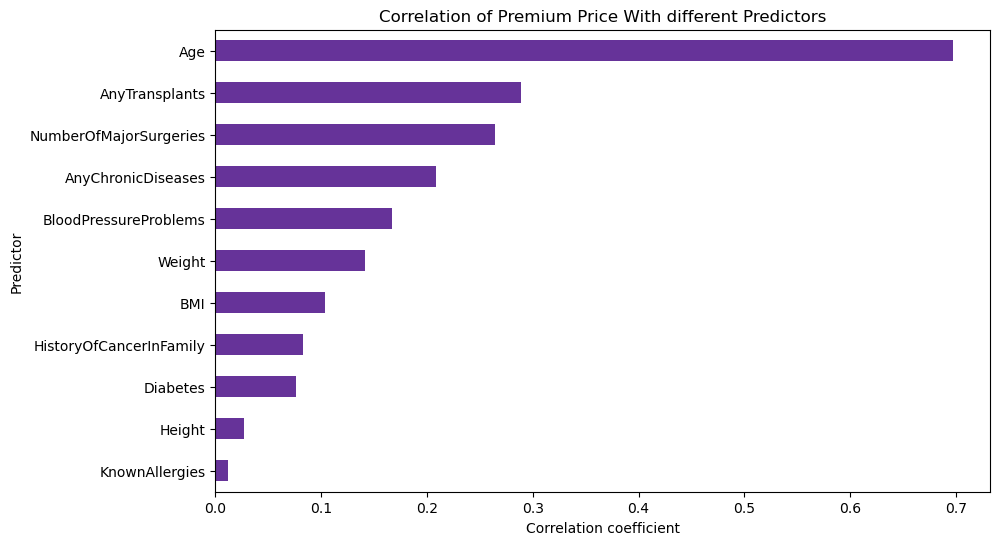

In [24]:
plt.figure(figsize=(10,6))
premium_corr.drop('PremiumPrice').sort_values(ascending=True).plot(kind='barh', color= "rebeccapurple")
plt.title("Correlation of Premium Price With different Predictors")
plt.xlabel("Correlation coefficient")
plt.ylabel("Predictor")
plt.show()

### The highest correlation with Premium price is with Age, AnyTransplants, NumberOfMajorSurgeries and AnyChronicDiseases. The strongest correlation is with age. For the other 3 variables, there is a very weak correlation. 

### **Outliers Detection**

In [25]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

Outliers in Weight: 16


<Axes: ylabel='Weight'>

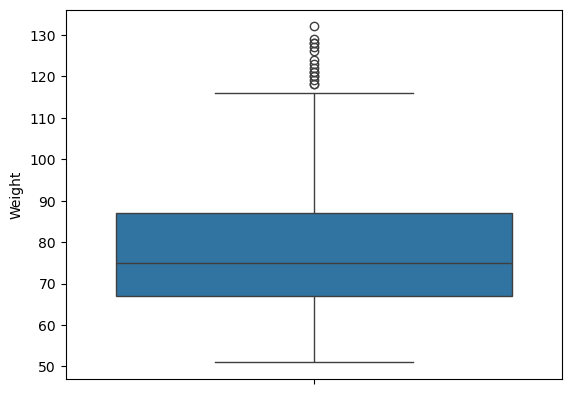

In [26]:
## Weight outliers
outliers_weight, lb, ub = detect_outliers_iqr(data, "Weight")
print("Outliers in Weight:", len(outliers_weight))
#print(outliers_weight)

sns.boxplot(y='Weight', data=data)

Outliers in Height: 0


<Axes: ylabel='Height'>

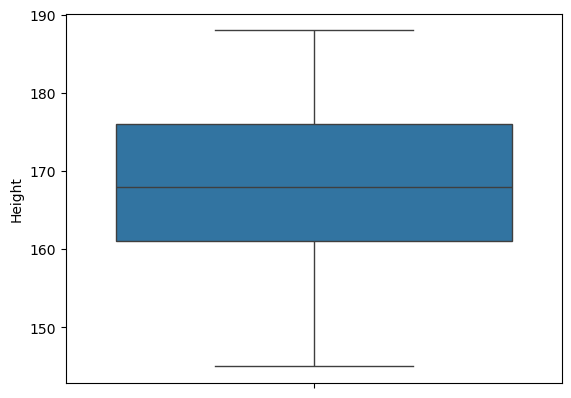

In [27]:
## Height outliers
outliers_height, lb_ht, ub_ht = detect_outliers_iqr(data, "Height")
print("Outliers in Height:", len(outliers_height))
#print(outliers_height)
sns.boxplot(y='Height', data=data)

Outliers in BMI: 22


<Axes: ylabel='BMI'>

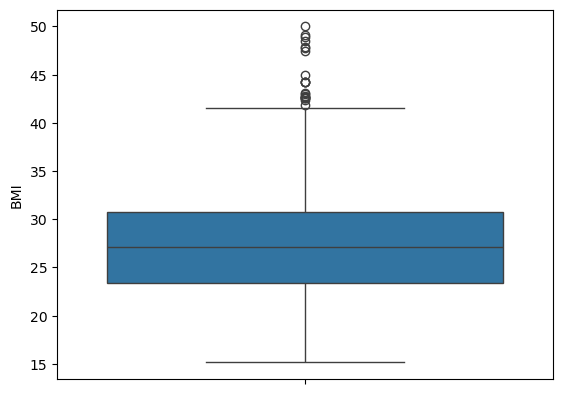

In [28]:
## BMI outliers
outliers_bmi, lb_bmi, ub_bmi = detect_outliers_iqr(data, "BMI")
print("Outliers in BMI:", len(outliers_bmi))
#print(outliers_bmi)
sns.boxplot(y='BMI', data=data)

Outliers in Age: 0


<Axes: ylabel='Age'>

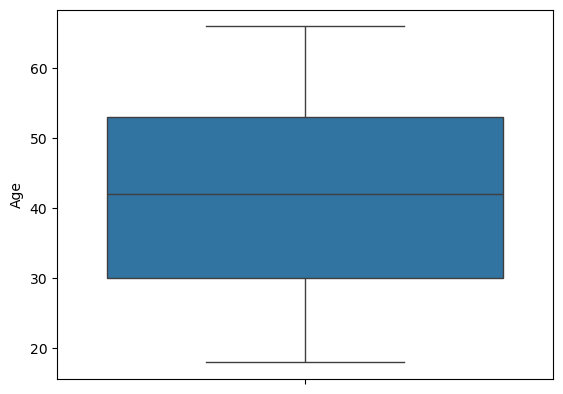

In [29]:
## Age outliers
outliers_age, lb_age, ub_age = detect_outliers_iqr(data, "Age")
print("Outliers in Age:", len(outliers_age))
#print(outliers_age)
sns.boxplot(y='Age', data=data)

Outliers in NumberOfMajorSurgeries: 16


<Axes: ylabel='NumberOfMajorSurgeries'>

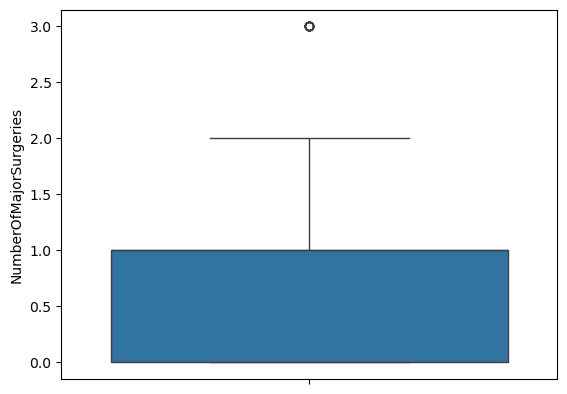

In [30]:
## NumberOfMajorSurgeries outliers
outliers_num_surg, lb_num_surg, ub_num_surg = detect_outliers_iqr(data, "NumberOfMajorSurgeries")
print("Outliers in NumberOfMajorSurgeries:", len(outliers_num_surg))
#print(outliers_num_surg)
sns.boxplot(y='NumberOfMajorSurgeries', data=data)

In [31]:
data['NumberOfMajorSurgeries'].value_counts()

NumberOfMajorSurgeries
0    479
1    372
2    119
3     16
Name: count, dtype: int64

In [34]:
#wt_ids = outliers_weight['PatientID'].to_list()
#bmi_ids = outliers_bmi['PatientID'].to_list()
#num_surg_ids = outliers_num_surg['PatientID'].to_list()

In [35]:
#common = list(set(wt_ids) & set(bmi_ids) & set(num_surg_ids))
#print(common)

In [36]:
#print(wt_ids)
#print(bmi_ids)
#print(num_surg_ids)

In [37]:
#common = list(set(wt_ids) & set(bmi_ids))
#print(common)

In [38]:
#data[data['PatientID'].isin(common)]

In [39]:
#data[data['PatientID'].isin(bmi_ids)]

In [40]:
#data[data['PatientID'].isin(wt_ids)]

### After a thorough analysis of outliers using the IQR method and boxplots for visualization, I found that there are outliers in Weight, number of major surgeries and BMI fields. 
### **Outlier treatment:**
1. NumberOfMajorSurgeries: The NumberOfMajorSurgeries variable contains very few cases for the value 3 (only 16 observations), while the categories 0, 1, and 2 each have over 100 samples. Such sparse categories can create unstable estimates and add noise to the model. Since the correlation with premium price is weak and the risk profile for 2 and 3 surgeries is similar (both representing multiple past surgeries), I merged them into a single category labeled “2+”. This preserves important information while improving category stability.

2. Weight and BMI: There are 16 outliers in the weight variable, all between 118 and 132 kg, which clearly stand out in the histogram. Although the linear correlation between weight and premium is low (0.14), weight is a known risk factor for several health conditions such as hypertension, diabetes, and heart disease which insurers consider when calculating premiums. The weak correlation likely reflects a non-linear relationship or interactions with other variables (age, smoking, medical history), rather than irrelevance. Since these high-weight cases may represent genuinely high-risk individuals, they carry important predictive information. Therefore, I will retain the outliers rather than remove them, preserving meaningful real-world variation. Similarly for BMI, all outliers fall within the range of 40-50 which falls under the category of obese which is again a cause of a lot of health problems. Therefore, I will retain the outliers in BMI as well to preserve real-world variation.

### **Hypothesis Testing**

In [41]:
from scipy.stats import ttest_ind

In [42]:
## T-test for the groups Diabetics vs Non-diabetics
## Null Hypothesis:
print("Null hypothesis: Both Diabetics and Non-diabetics have the same mean premium prices.")
print("Alternate hypothesis: Diabetics and Non-diabetics have different mean premium prices.")

D = data[data['Diabetes'] == 1]['PremiumPrice']
ND = data[data['Diabetes'] == 0]['PremiumPrice']

t_stat, p_value = ttest_ind(D, ND, equal_var=False)  # Welch’s t-test
print(f"t stat:{np.round(t_stat,4)}, p value: {np.round(p_value,4)}")

Null hypothesis: Both Diabetics and Non-diabetics have the same mean premium prices.
Alternate hypothesis: Diabetics and Non-diabetics have different mean premium prices.
t stat:2.4489, p value: 0.0145


### As the p-value is below 0.05, it suggests that there is a statistically significant difference in the means premium prices between diabetic (D) and non-diabetic (ND) individuals. 

In [43]:
## T-test for the groups bloodpressure problems vs no blood pressure problems
## Null Hypothesis:
print("Null hypothesis: There is no difference between the mean premium prices of individuals with and without BP problems.")
print("Alternate hypothesis: There is a statistically significant difference between the mean premium prices of individuals with and without BP problems.")

BP = data[data['BloodPressureProblems'] == 1]['PremiumPrice']
NBP = data[data['BloodPressureProblems'] == 0]['PremiumPrice']

t_stat, p_value = ttest_ind(BP, NBP, equal_var=False)  # Welch’s t-test
print(f"t stat:{t_stat}, p value: {p_value}")

Null hypothesis: There is no difference between the mean premium prices of individuals with and without BP problems.
Alternate hypothesis: There is a statistically significant difference between the mean premium prices of individuals with and without BP problems.
t stat:5.370281271166068, p value: 9.813498313247295e-08


### As the p-value is below 0.05, it suggests that there is a statistically significant difference in the means premium prices between individuals with (BP) and without (NBP) Blood Pressure problems.

In [44]:
## T-test for individuals who have undergone transplants vs. those who haven't had a transplant.
## Null Hypothesis:
print("Null hypothesis: There is no difference between the mean premium prices of individuals with and without Transplants.")
print("Alternate hypothesis: There is a statistically significant difference between the mean premium prices of individuals with and without Transplants.")

T = data[data['AnyTransplants'] == 1]['PremiumPrice']
NT = data[data['AnyTransplants'] == 0]['PremiumPrice']

t_stat, p_value = ttest_ind(T, NT, equal_var=False)  # Welch’s t-test
print(f"t stat:{t_stat}, p value: {p_value}")

Null hypothesis: There is no difference between the mean premium prices of individuals with and without Transplants.
Alternate hypothesis: There is a statistically significant difference between the mean premium prices of individuals with and without Transplants.
t stat:6.2599390386040215, p value: 5.544902737541748e-08


### As the p-value is below 0.05, it suggests that there is a statistically significant difference in the means premium prices between individuals with (T) and without (NT) Transplants.

In [45]:
## T-test for individuals who have any chronic diseases vs. those who do not have any chronic diseases.
## Null Hypothesis:
print("Null hypothesis: There is no difference between the mean premium prices of individuals with and without Chronic Diseases.")
print("Alternate hypothesis: There is a statistically significant difference between the mean premium prices of individuals with and without Chronic Diseases.")

CD = data[data['AnyChronicDiseases'] == 1]['PremiumPrice']
NCD = data[data['AnyChronicDiseases'] == 0]['PremiumPrice']

t_stat, p_value = ttest_ind(CD, NCD, equal_var=False)  # Welch’s t-test
print(f"t stat:{t_stat}, p value: {p_value}")

Null hypothesis: There is no difference between the mean premium prices of individuals with and without Chronic Diseases.
Alternate hypothesis: There is a statistically significant difference between the mean premium prices of individuals with and without Chronic Diseases.
t stat:7.707663368460665, p value: 1.7279736467737666e-13


### As the p-value is below 0.05, it suggests that there is a statistically significant difference in the means premium prices between individuals with (CD) and without (NCD) Chronic Diseases.

In [46]:
## T-test for individuals who have any Known Allergies vs. those who do not have any allergies.
## Null Hypothesis:
print("Null hypothesis: There is no difference between the mean premium prices of individuals with and without Known allergies.")
print("Alternate hypothesis: There is a statistically significant difference between the mean premium prices of individuals with and without Known allergies.")

KA = data[data['KnownAllergies'] == 1]['PremiumPrice']
NKA = data[data['KnownAllergies'] == 0]['PremiumPrice']

t_stat, p_value = ttest_ind(KA, NKA, equal_var=False)  # Welch’s t-test
print(f"t stat:{t_stat}, p value: {p_value}")

Null hypothesis: There is no difference between the mean premium prices of individuals with and without Known allergies.
Alternate hypothesis: There is a statistically significant difference between the mean premium prices of individuals with and without Known allergies.
t stat:0.36668963110854214, p value: 0.7140924633237387


### As the p-value is above 0.05, it suggests that there is a statistically significant difference in the means premium prices between individuals with (KA) and without (NKA) Known Allergies.

In [47]:
## T-test for individuals who have any HistoryOfCancerInFamily vs. those who do not have any HistoryOfCancerInFamily.
## Null Hypothesis:
print("Null hypothesis: There is no difference between the mean premium prices of individuals with and without History Of Cancer In Family.")
print("Alternate hypothesis: There is a statistically significant difference between the mean premium prices of individuals with and without History Of Cancer In Family.")

Ca = data[data['HistoryOfCancerInFamily'] == 1]['PremiumPrice']
NCa = data[data['HistoryOfCancerInFamily'] == 0]['PremiumPrice']

t_stat, p_value = ttest_ind(Ca, NCa, equal_var=False)  # Welch’s t-test
print(f"t stat:{t_stat}, p value: {p_value}")

Null hypothesis: There is no difference between the mean premium prices of individuals with and without History Of Cancer In Family.
Alternate hypothesis: There is a statistically significant difference between the mean premium prices of individuals with and without History Of Cancer In Family.
t stat:2.3567519547641984, p value: 0.01982822652964323


### As the p-value is below 0.05, it suggests that there is a statistically significant difference in the means premium prices between individuals with (Ca) and without (NCa) History Of Cancer In Family.

### **Results of T-tests for Categorical variables**
### For all factors other than "Known Allergies", there is a statistically significant difference in the mean premium prices between different groups suggesting that these factors might be important determinants for the value of Premium Prices.

## Merging NumberOfMajorSurgeries 2 and 3 into a single category => 2+ and performing One-Way ANOVA to find out if mean premium prices differ significantly between different groups within NumberOfMajorSurgeries

In [48]:
## Merging number of surgeries 2 and 3 into a single category => 2+
def num_surg(num):
    if num >= 2:
        return 2
    else:
        return num

In [49]:
data["#MajorSurgeries"] = data["NumberOfMajorSurgeries"].apply(num_surg)

In [50]:
#data[data["NumberOfMajorSurgeries"]>=2].head()
print(data["NumberOfMajorSurgeries"].value_counts())
print(data["#MajorSurgeries"].value_counts())

NumberOfMajorSurgeries
0    479
1    372
2    119
3     16
Name: count, dtype: int64
#MajorSurgeries
0    479
1    372
2    135
Name: count, dtype: int64


In [52]:
from scipy.stats import f_oneway

In [53]:
print("Null hypothesis: There is no difference between the mean premium prices of individuals between different groups of number of major surgeries.")
print("Alternate hypothesis: There is a statistically significant difference between the mean premium prices of individuals between different groups of number of major surgeries.")

groups = [data[data['#MajorSurgeries'] == c]['PremiumPrice'] for c in data['#MajorSurgeries'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"F stat: {f_stat}, P value: {p_value}")

Null hypothesis: There is no difference between the mean premium prices of individuals between different groups of number of major surgeries.
Alternate hypothesis: There is a statistically significant difference between the mean premium prices of individuals between different groups of number of major surgeries.
F stat: 39.2415277169692, P value: 4.0158930660447635e-17


### **Results of One-Way ANOVA**
### As the pvalue is below 0.05, this suggests that there is a significant difference in mean premium prices among the groups within "#MajorSurgeries" variable.

### **Chi square Tests to find association between different Categorical variables**

In [54]:
# Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, KnownAllergies, HistoryOfCancerInFamily, #MajorSurgeries, BMI_cat, Age_Cat

In [55]:
from scipy.stats import chi2_contingency

# Disabetes vs BloodPressureProblems
print("Null hypothesis: The variables Diabetes and BloodPressureProblems are independent")
print("Alternate hypothesis: The variables Diabetes and BloodPressureProblems are not independent")
cont_table = pd.crosstab(data['Diabetes'], data['BloodPressureProblems'])

chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("Expected values:\n", expected)

Null hypothesis: The variables Diabetes and BloodPressureProblems are independent
Alternate hypothesis: The variables Diabetes and BloodPressureProblems are not independent
Chi-square statistic: 15.571225392078397
Degrees of freedom: 1
p-value: 7.945461025980538e-05
Expected values:
 [[303.98377282 268.01622718]
 [220.01622718 193.98377282]]


### As p-value is below 0.05, this suggests that the variables Diabetes and BloodPressureProblems are **associated** with each other.

In [56]:
# Disabetes vs Age_categories
print("Null hypothesis: The variables Diabetes and Age_Cat are independent")
print("Alternate hypothesis: The variables Diabetes and Age_Cat are not independent")
cont_table = pd.crosstab(data['Diabetes'], data['Age_Cat'])

chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("Expected values:\n", expected)

Null hypothesis: The variables Diabetes and Age_Cat are independent
Alternate hypothesis: The variables Diabetes and Age_Cat are not independent
Chi-square statistic: 47.78581289356164
Degrees of freedom: 5
p-value: 3.9280700937055175e-09
Expected values:
 [[ 25.52535497 174.03651116 121.24543611 123.56592292  49.31034483
   78.31643002]
 [ 18.47464503 125.96348884  87.75456389  89.43407708  35.68965517
   56.68356998]]


### As p-value is below 0.05, this suggests that the variables Diabetes and Age_Cat are **associated** with each other.

In [57]:
# Disabetes vs BMI_categories
print("Null hypothesis: The variables Diabetes and BMI_categories are independent")
print("Alternate hypothesis: The variables Diabetes and BMI_categories are not independent")
cont_table = pd.crosstab(data['Diabetes'], data['BMI_cat'])

chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("Expected values:\n", expected)

Null hypothesis: The variables Diabetes and BMI_categories are independent
Alternate hypothesis: The variables Diabetes and BMI_categories are not independent
Chi-square statistic: 4.106847559573959
Degrees of freedom: 3
p-value: 0.25015526788506165
Expected values:
 [[185.63894523 176.35699797 187.95943205  22.04462475]
 [134.36105477 127.64300203 136.04056795  15.95537525]]


### As p-value is above 0.05, this suggests that the variables Diabetes and BMI_cat are **not associated** with each other.

In [58]:
# AnyTransplants vs AnyChronicDiseases
print("Null hypothesis: The variables AnyTransplants and AnyChronicDiseases are independent")
print("Alternate hypothesis: The variables AnyTransplants and AnyChronicDiseases are not independent")
cont_table = pd.crosstab(data['AnyTransplants'], data['AnyChronicDiseases'])

chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("Expected values:\n", expected)

Null hypothesis: The variables AnyTransplants and AnyChronicDiseases are independent
Alternate hypothesis: The variables AnyTransplants and AnyChronicDiseases are not independent
Chi-square statistic: 0.8603776272400288
Degrees of freedom: 1
p-value: 0.35363303686928205
Expected values:
 [[762.92900609 168.07099391]
 [ 45.07099391   9.92900609]]


### As p-value is above 0.05, this suggests that the variables AnyTransplants and AnyChronicDiseases are **not associated** with each other.

In [117]:
# AnyTransplants vs NumberOfMajorSurgeries
print("Null hypothesis: The variables AnyTransplants and #MajorSurgeries are independent")
print("Alternate hypothesis: The variables AnyTransplants and #MajorSurgeries are not independent")
cont_table = pd.crosstab(data['AnyTransplants'], data['#MajorSurgeries'])

chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("Expected values:\n", expected)

Null hypothesis: The variables AnyTransplants and #MajorSurgeries are independent
Alternate hypothesis: The variables AnyTransplants and #MajorSurgeries are not independent
Chi-square statistic: 0.6081677953666293
Degrees of freedom: 2
p-value: 0.7377989642300502
Expected values:
 [[452.28093306 351.2494929  127.46957404]
 [ 26.71906694  20.7505071    7.53042596]]


### As p-value is above 0.05, this suggests that the variables AnyTransplants and #MajorSurgeries are **not associated** with each other.

In [116]:
# AnyChronicDiseases vs NumberOfMajorSurgeries
print("Null hypothesis: The variables AnyChronicDiseases and #MajorSurgeries are independent")
print("Alternate hypothesis: The variables AnyChronicDiseases and #MajorSurgeries are not independent")
cont_table = pd.crosstab(data['AnyChronicDiseases'], data['#MajorSurgeries'])

chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("Expected values:\n", expected)

Null hypothesis: The variables AnyChronicDiseases and #MajorSurgeries are independent
Alternate hypothesis: The variables AnyChronicDiseases and #MajorSurgeries are not independent
Chi-square statistic: 0.8299694664894217
Degrees of freedom: 2
p-value: 0.6603503620354103
Expected values:
 [[392.52738337 304.84381339 110.62880325]
 [ 86.47261663  67.15618661  24.37119675]]


### As p-value is above 0.05, this suggests that the variables AnyChronicDiseases and #MajorSurgeries are **not associated** with each other.

In [118]:
# HistoryOfCancerInFamily vs NumberOfMajorSurgeries
print("Null hypothesis: The variables HistoryOfCancerInFamily and #MajorSurgeries are independent")
print("Alternate hypothesis: The variables HistoryOfCancerInFamily and #MajorSurgeries are not independent")
cont_table = pd.crosstab(data['HistoryOfCancerInFamily'], data['#MajorSurgeries'])

chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("Expected values:\n", expected)

Null hypothesis: The variables HistoryOfCancerInFamily and #MajorSurgeries are independent
Alternate hypothesis: The variables HistoryOfCancerInFamily and #MajorSurgeries are not independent
Chi-square statistic: 158.90064516129033
Degrees of freedom: 2
p-value: 3.1272551600721973e-35
Expected values:
 [[422.64705882 328.23529412 119.11764706]
 [ 56.35294118  43.76470588  15.88235294]]


### As p-value is below 0.05, this suggests that the variables HistoryOfCancerInFamily and #MajorSurgeries are **associated** with each other.

In [119]:
# AnyChronicDiseases vs KnownAllergies
print("Null hypothesis: The variables AnyChronicDiseases and KnownAllergies are independent")
print("Alternate hypothesis: The variables AnyChronicDiseases and KnownAllergies are not independent")
cont_table = pd.crosstab(data['AnyChronicDiseases'], data['KnownAllergies'])

chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("Expected values:\n", expected)

Null hypothesis: The variables AnyChronicDiseases and KnownAllergies are independent
Alternate hypothesis: The variables AnyChronicDiseases and KnownAllergies are not independent
Chi-square statistic: 0.5778579425673225
Degrees of freedom: 1
p-value: 0.4471531660063278
Expected values:
 [[634.27180527 173.72819473]
 [139.72819473  38.27180527]]


### As p-value is above 0.05, this suggests that the variables AnyChronicDiseases and KnownAllergies are **not associated** with each other.

In [120]:
# Diabetes vs KnownAllergies
print("Null hypothesis: The variables Diabetes and KnownAllergies are independent")
print("Alternate hypothesis: The variables Diabetes and KnownAllergies are not independent")
cont_table = pd.crosstab(data['Diabetes'], data['KnownAllergies'])

chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("Expected values:\n", expected)

Null hypothesis: The variables Diabetes and KnownAllergies are independent
Alternate hypothesis: The variables Diabetes and KnownAllergies are not independent
Chi-square statistic: 5.937672731640452
Degrees of freedom: 1
p-value: 0.014820575766547196
Expected values:
 [[449.01419878 122.98580122]
 [324.98580122  89.01419878]]


### As p-value is below 0.05, this suggests that the variables Diabetes and KnownAllergies are **associated** with each other.

In [121]:
# AnyTransplants vs HistoryOfCancerInFamily
print("Null hypothesis: The variables AnyTransplants and HistoryOfCancerInFamily are independent")
print("Alternate hypothesis: The variables AnyTransplants and HistoryOfCancerInFamily are not independent")
cont_table = pd.crosstab(data['AnyTransplants'], data['HistoryOfCancerInFamily'])

chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("Expected values:\n", expected)

Null hypothesis: The variables AnyTransplants and HistoryOfCancerInFamily are independent
Alternate hypothesis: The variables AnyTransplants and HistoryOfCancerInFamily are not independent
Chi-square statistic: 0.17474758324382383
Degrees of freedom: 1
p-value: 0.6759264929226855
Expected values:
 [[821.47058824 109.52941176]
 [ 48.52941176   6.47058824]]


### As p-value is above 0.05, this suggests that the variables AnyTransplants and HistoryOfCancerInFamily are **not associated** with each other.

### The results of the Chi-square analysis indicate that the following variables might be associated with each other:
1. Diabetes - BloodPressureProblems
2. Diabetes - Age_cat
3. HistoryOfCancerInFamily - #MajorSurgeries
4. Diabetes - KnownAllergies

### **Linear Regression**

In [69]:
data.head()

,PatientID,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_cat,Age_Cat,#MajorSurgeries
0,1,45,0,0,0,0,155,57,0,0,0,25000,23.73,Healthy,Early Middle-aged (45-55),0
1,2,60,1,0,0,0,180,73,0,0,0,29000,22.53,Healthy,Seniors (60+),0
2,3,36,1,1,0,0,158,59,0,0,1,23000,23.63,Healthy,Older adults (35-45),1
3,4,52,1,1,0,1,183,93,0,0,2,28000,27.77,Overweight,Early Middle-aged (45-55),2+
4,5,38,0,0,0,1,166,88,0,0,1,23000,31.93,Obese,Older adults (35-45),1


### Removing newly added features: Age_Cat, BMI_cat, #MajorSurgeries. Keeping BMI. Removing Height and Weight as BMI is present to avoid multicollinearity.

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
X = data.drop(columns=['PatientID','PremiumPrice','BMI_cat','Age_Cat','NumberOfMajorSurgeries','Height','Weight'], axis=1)
y = data['PremiumPrice']
X = X.copy()

In [109]:
X['#MajorSurgeries'] = X['#MajorSurgeries'].replace({'2+':2}).astype('int')

C:\Users\Riddhi\AppData\Local\Temp\ipykernel_13216\3363303588.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['#MajorSurgeries'] = X['#MajorSurgeries'].replace({'2+':2}).astype('int')


In [110]:
X['#MajorSurgeries'].value_counts()

#MajorSurgeries
0    479
1    372
2    135
Name: count, dtype: int64

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Coefficients
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr.coef_})
print(coeff_df)

                   Feature  Coefficient
0                      Age   323.741725
1                 Diabetes  -385.086755
2    BloodPressureProblems    99.965638
3           AnyTransplants  7407.391916
4       AnyChronicDiseases  2576.481563
5           KnownAllergies   177.364051
6  HistoryOfCancerInFamily  2127.020888
7                      BMI   141.560993
8          #MajorSurgeries  -646.191347


In [105]:
y_pred = lr.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R²: 0.7076356558969147
RMSE: 12467231.782790704


In [106]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_sm).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sat, 13 Dec 2025   Prob (F-statistic):          5.99e-154
Time:                        15:59:04   Log-Likelihood:                -7621.0
No. Observations:                 788   AIC:                         1.526e+04
Df Residuals:                     778   BIC:                         1.531e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    6

### **Checking Residual plots**

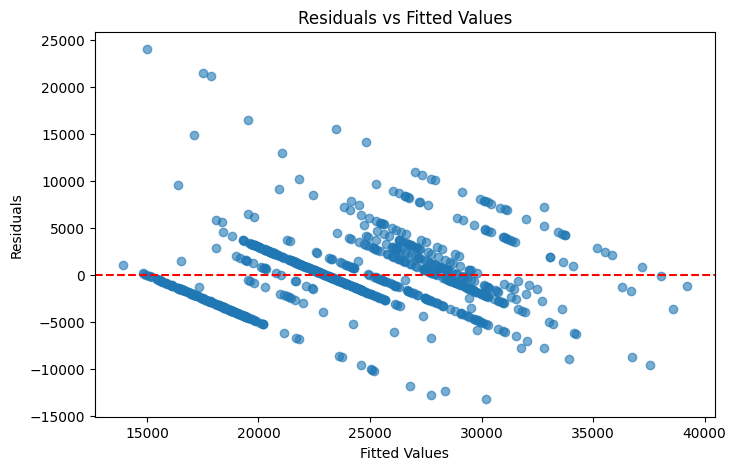

In [122]:
fitted_vals = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8,5))
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

### The residuals are centered around zero with no clear non-linear pattern, indicating that the linearity assumption is reasonably satisfied.

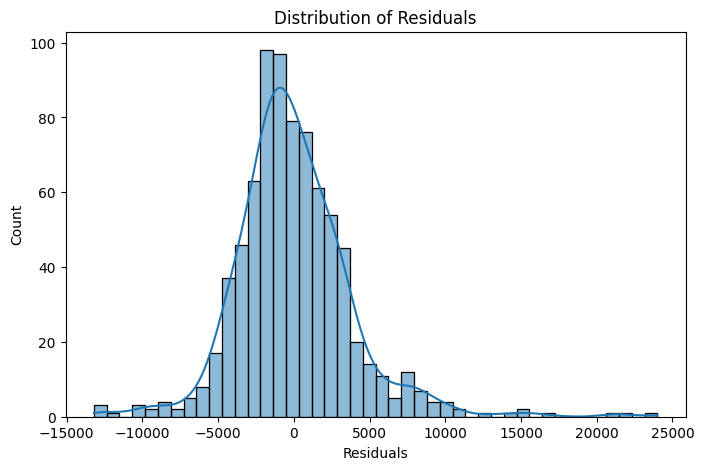

In [123]:
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()


### The residual distribution is approximately symmetric with moderate tails, which is acceptable for linear regression with real-world cost data.

In [126]:
residuals.describe()

count    7.880000e+02
mean    -2.616759e-11
std      3.839173e+03
min     -1.320945e+04
25%     -2.131377e+03
50%     -4.617921e+02
75%      1.858149e+03
max      2.401022e+04
dtype: float64

In [127]:
residuals_np = residuals.values

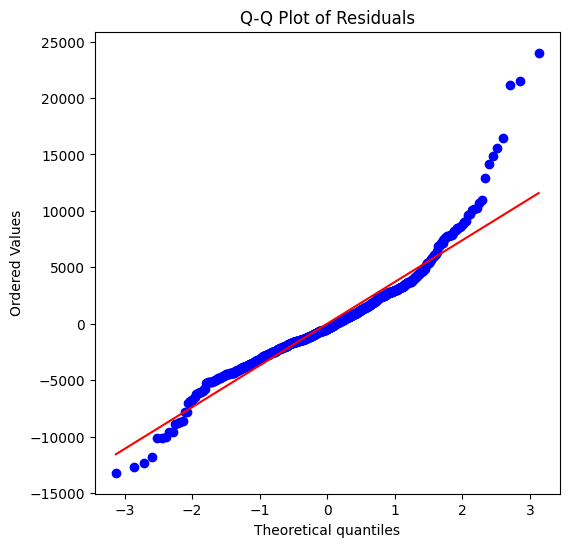

In [128]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
stats.probplot(residuals_np, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

### Residuals show mild deviations from normality at the tails, which is expected for insurance premium data. Given the sample size and the robustness of OLS estimates, these deviations are not considered severe.

### **Regression Diagnostics**
* To evaluate the validity of the linear regression model, residual diagnostics were examined.
* The residuals versus fitted values plot shows residuals centered around zero with no clear non-linear pattern, indicating that the linearity assumption is reasonably satisfied. While slight banding is visible, this is expected due to the presence of binary and categorical predictors in the model.
* The histogram of residuals is approximately symmetric around zero, with moderate tails. This suggests that extreme prediction errors are limited to a small number of observations.
* The Q–Q plot of residuals shows close alignment with the theoretical normal line in the central region, with deviations at the tails. Such deviations are common in insurance premium data, where extreme values are more frequent than under a normal distribution.
* Overall, while residuals exhibit mild non-normality in the tails, the assumptions of linear regression are sufficiently met for inference and interpretation. Given the sample size and real-world nature of the data, the model results are considered reliable.

### **Results**

* A multiple linear regression model was fitted to evaluate the impact of demographic and health-related factors on insurance premium prices. The final model achieved an adjusted R² of 0.609, indicating that approximately 61% of the variation in premium prices is explained by the selected predictors.
* Age emerged as a strong and statistically significant predictor, with premiums increasing by approximately ₹324 per additional year of age. BMI also showed a significant positive association with premium prices, reflecting increased risk with higher body mass.
* Medical history variables had substantial effects. Individuals with a history of organ transplants incurred significantly higher premiums, with an average increase of approximately ₹7,400. The presence of chronic diseases and a family history of cancer were also associated with significantly higher premium prices.
* The number of major surgeries showed a statistically significant negative coefficient. This may reflect post-surgical stabilization or risk adjustments already captured by other medical variables in the model, highlighting the importance of cautious interpretation of individual coefficients.
* Residual diagnostics indicated mild skewness and heteroscedasticity, which are expected in insurance pricing data. No severe violations of linear regression assumptions were observed, and multicollinearity was minimal, as indicated by a low condition number.
* Diabetes, BloodPressureProblems and KnownAllergies are not significant predictors as per both OLS and correlation analysis results.

### Overall, the regression results align well with domain knowledge and provide meaningful insights into the key drivers of insurance premium pricing.

### **Preparing Data for ML: Keeping the variables:** 
* PatientID
* Age
* Diabetes
* BloodPressureProblems
* AnyTransplants
* AnyChronicDiseases 	
* KnownAllergies
* HistoryOfCancerInFamily 	
* PremiumPrice
* BMI
* #MajorSurgeries

In [134]:
ml_data = data.drop(columns =['Height','Weight','NumberOfMajorSurgeries','BMI_cat','Age_Cat'])
ml_data.head()

,PatientID,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,PremiumPrice,BMI,#MajorSurgeries
0,1,45,0,0,0,0,0,0,25000,23.73,0
1,2,60,1,0,0,0,0,0,29000,22.53,0
2,3,36,1,1,0,0,0,0,23000,23.63,1
3,4,52,1,1,0,1,0,0,28000,27.77,2
4,5,38,0,0,0,1,0,0,23000,31.93,1


In [135]:
ml_data.to_csv("ml_data.csv",index=False)

# END of BLOCK2